In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import tqdm
import time
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 2px  black solid !important;
    color: black !important;
}
</style>

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [7]:
df = pd.read_table("D:/data/fruit_data_with_colors.txt")
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [18]:
print(df.fruit_label.unique())
print(df.fruit_name.unique())
        

[1 2 3 4]
['apple' 'mandarin' 'orange' 'lemon']


In [20]:
fruit_lookup_maping = dict(zip(df.fruit_label.unique(),df.fruit_name.unique()))
fruit_lookup_maping

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [21]:
print(fruit_lookup_maping)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


In [24]:
df.shape

(59, 7)

In [25]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [26]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [28]:
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D52E77D978>,
      dtype=object)

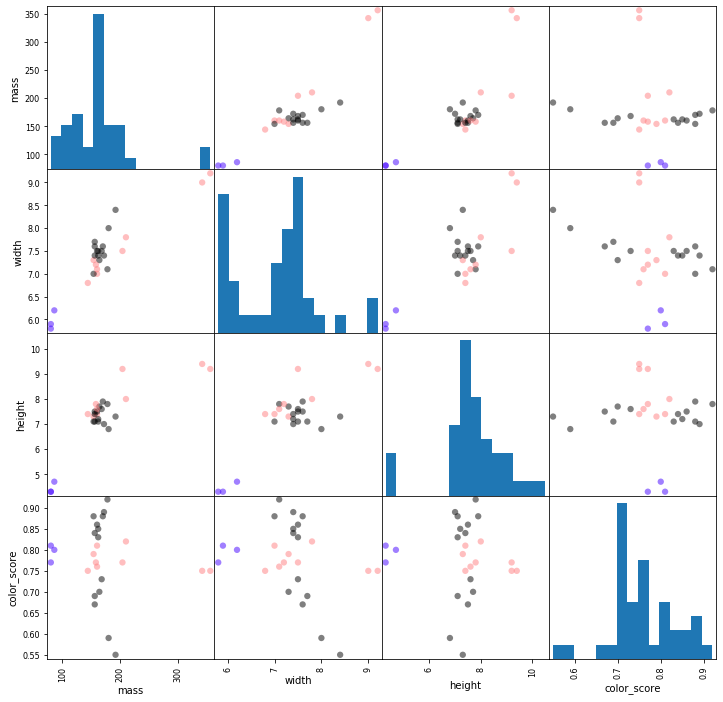

In [44]:
X = df[["mass", "width", "height", "color_score"]]
Y = df["fruit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)
# plotting a scatter matrix

from matplotlib import cm
cmap = cm.get_cmap('gnuplot2')
pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap = cmap)

In [48]:
X_train.head()

,mass,width,height,color_score
49,132,5.8,8.7,0.73
29,160,7.0,7.4,0.81
37,154,7.3,7.3,0.79
56,116,5.9,8.1,0.73
18,162,7.5,7.1,0.83


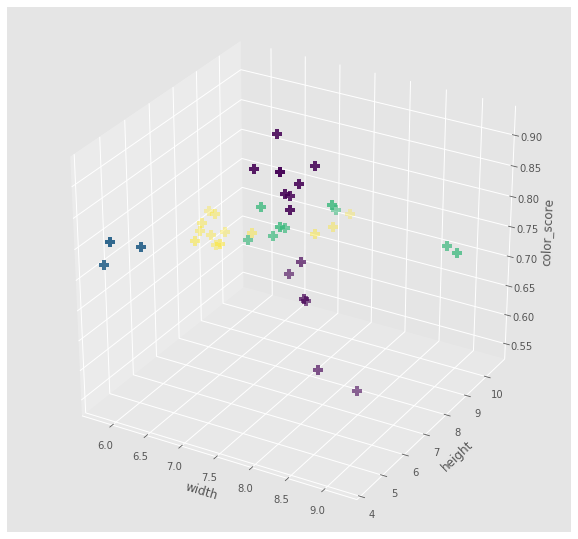

In [56]:
## ploting 3d Plot
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train["width"], X_train["height"], X_train["color_score"], c= y_train, marker='+', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [143]:
X = df[["mass", "width", "height", "color_score"]]
Y = df["fruit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [144]:
# create a clasifier object

from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier()
Knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [145]:
# Estimate the accuracy of the classifier on future data, using the test data
Knn.score(X_test, y_test)

0.5

In [146]:
# Use the trained k-NN classifier model to classify new, previously unseen objects
# first example: a small fruit with mass 132g, width 5.8cm, height 8.5 cm, color_score=0.73
fruit_prediction = Knn.predict([[132, 5.8,8.7,0.73 ]])
fruit_lookup_maping[fruit_prediction[0]]

'lemon'

In [147]:
fruit_prediction = Knn.predict([[20, 4.3, 5.5, 0.77]])
fruit_lookup_maping[fruit_prediction[0]]

'mandarin'

In [148]:
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

In [215]:
X = df[["mass", "width", "height", "color_score"]]
Y = df["fruit_label"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)


In [218]:
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']]
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min = X_mat.iloc[:, 0].min() - 1
    x_max = X_mat.iloc[:, 0].max() + 1
    y_min = X_mat.iloc[:, 1].min() - 1 
    y_max = X_mat.iloc[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                       numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat.iloc[:, 0], X_mat.iloc[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()


    

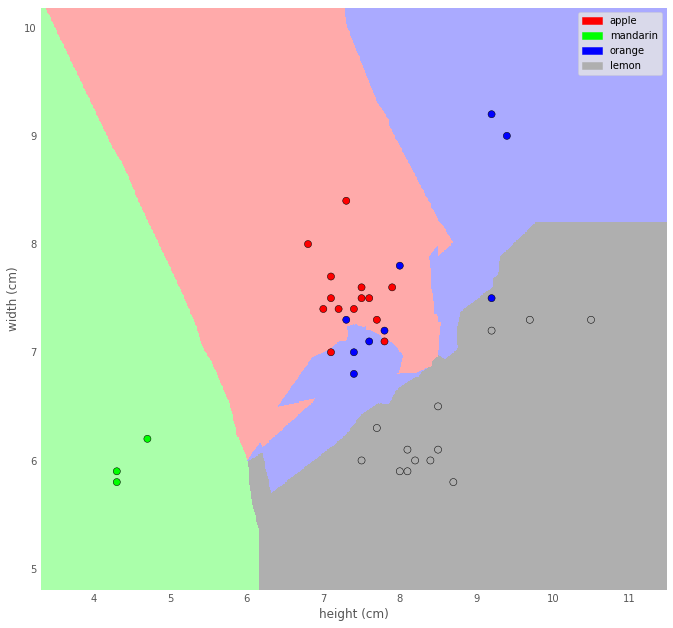

In [219]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')

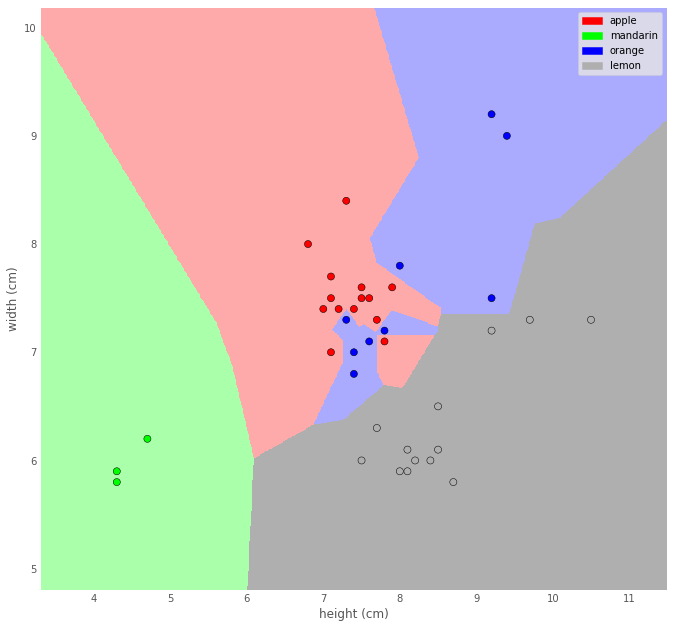

In [220]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')

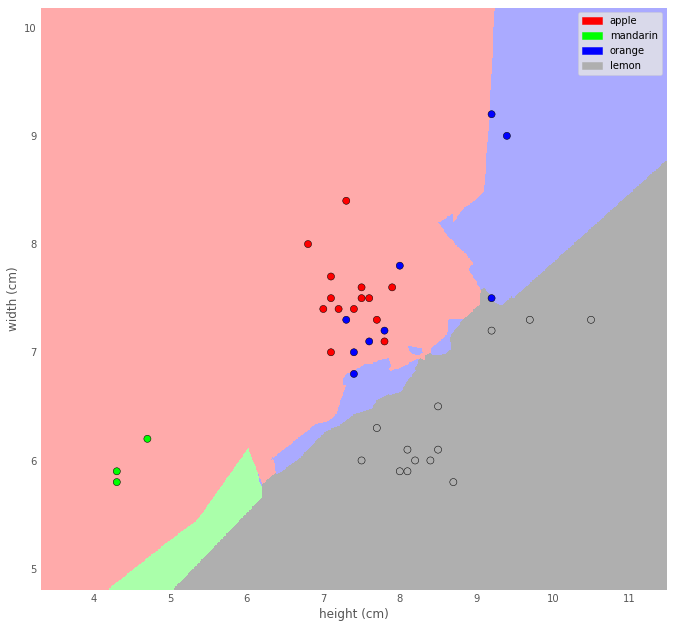

In [221]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

([<matplotlib.axis.XTick at 0x2d5423402e8>,
 <a list of 5 Text xticklabel objects>)

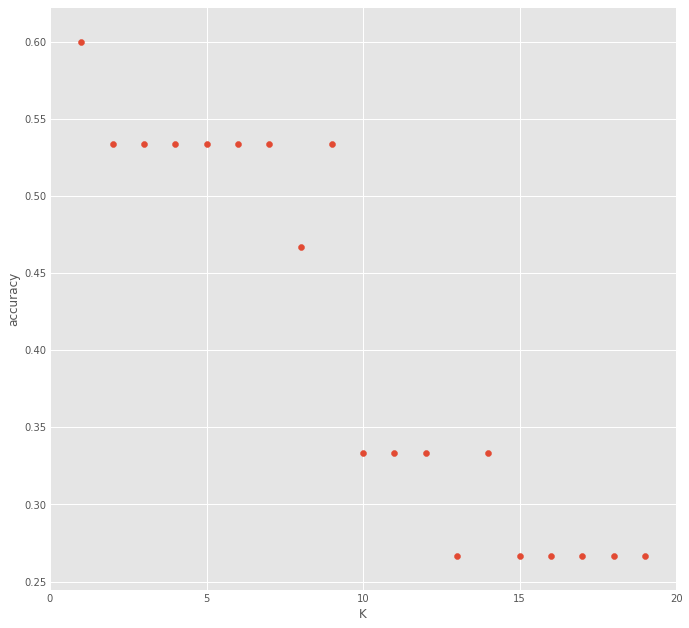

In [211]:
# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter
k_range = range(1,20)
scores = []

for k in k_range:
    Knn = KNeighborsClassifier(n_neighbors=k)
    Knn.fit(X_train, y_train)
    scores.append(Knn.score(X_test,y_test))
plt.figure(figsize=(10,10))
plt.xlabel('K')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])


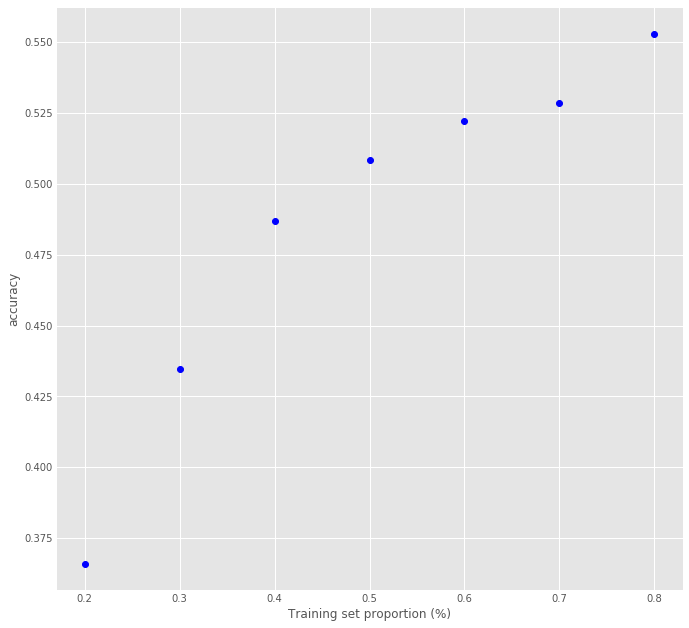

In [214]:
# How sensitive is k-NN classification accuracy to the train/test split proportion
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors = 5)
plt.figure(figsize=(10,10))
for s in t:
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');